# Credit Card Fraud Detection

<b>Business Objective:</b> Fraud detection has been one of the major challenge in banking industry. The challenge is that if the fraudulent activities are un-noticed then the bank ends up with huge financial losses, trust and credibility and this is a concerning issue to both banks and customers alike. 

Objective is to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect as much of the fraudulent transactions as possible, while minimizing the incorrect fraud classifications.

<u><b>Project Pipeline:</b></u>

- Data Understanding
    - Importing necessary libraries
    - Loading the data
- Exploratory Data Analysis
    - Checking for Null Values
    - Distribution of Non-Fradulent and Fradulent classes
    - Checking if the the data is imbalanced or not
    - Univariant Analysis on the class variable with other variables
    - Dropping the unnecassary variables
- Train/Test data Split
- Feature Scaling (Continous variable)
- Checking for skewness of the data by plotting the distribution of variables
- Model Building / Hyperparameter Tuning. Will be building different models with;
    - imbalanced Dataset
    - Balanced Dataset
- Model Evaluation

## Data Understanding
Importing the necessary libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

# Load the library for splitting the data
from sklearn.model_selection import train_test_split

# To view all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Reading the Creditcard dataset
CC_data = pd.read_csv('creditcard.csv')
CC_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [3]:
CC_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can note that the dataset has 284807 data entries across 31 columns, one of them being the Target variable - Class. Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [5]:
#checking for null values in the dataset
CC_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- There are no missing values in the data

### Data Imbalance
Checking for data imbalance with respect to the target variable - Class

In [6]:
classes=CC_data['Class'].value_counts()
print(classes)

0    284315
1       492
Name: Class, dtype: int64


In [7]:
# percentage of fraudulent transcations
ratio_cases = classes/len(CC_data.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.001727485630620034
Ratio of non-fraudulent cases: 0.9982725143693799


The ratio of fraudulent transactions is very low. The data is imbalanced. let us now visually represent it and then balance the data

In [8]:
# Creating temp dataframe
df = pd.DataFrame({'Class': classes.index,'Count': classes.values})
df.head()

,Class,Count
0,0,284315
1,1,492


   Class   Count
0      0  284315
1      1     492


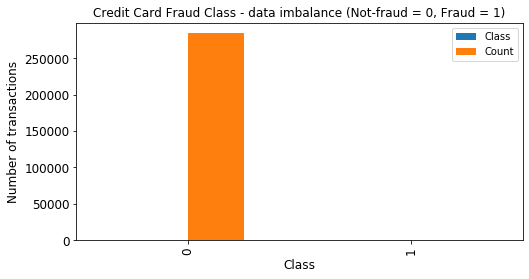

Text(0.5, 0, 'Percentage of count')

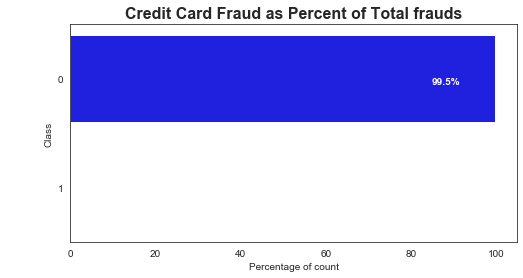

In [9]:
print(df)

ax = df.plot(kind='bar', title ="Credit Card Fraud Class - data imbalance (Not-fraud = 0, Fraud = 1)", figsize=(8,4), legend=True, fontsize=12)
ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("Number of transactions", fontsize=12)
plt.show()

sns.set_style("white")
x2 = df['Class']
y2 = df['Count']*100/(sum(df['Count']))
palette = ['blue','mediumvioletred']
fig, ax = plt.subplots(figsize = (8,4))

fig = sns.barplot(y2, x2, ci = None, orient='h', palette=palette)
y_lab = ['0', '1']
ax.set_yticklabels(labels=y_lab, ha='right')

for i, v in enumerate(y2):
    ax.text(v - 15, i + .05, str(int(v)+.5)+'%', color='white', fontweight='bold')

plt.title('Credit Card Fraud as Percent of Total frauds',size = 16, weight = 'bold')
plt.ylabel('Class')
plt.xlabel('Percentage of count')

- By seeing the distributions we can see how skewed and how imbalanced is our original dataset. Most of the transactions are non-fraud. If we do not balance the dataset for out analysis then we might get a lot of errors and our algorithms will probably overfit since it will assume that most transactions are not fraud. We need to build a model that will detect the frauds.

Let's check for amount details for both Fraudulent and Non-Fradulent Transaction

In [10]:
fraud_data = CC_data[CC_data['Class'] == 1] 
valid_data = CC_data[CC_data['Class'] == 0]

In [11]:
#Checking for Fraudulent Transaction
print("Amount details of the fraudulent transaction") 
fraud_data.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
#Checking for Normal transaction
print("Amount details of valid transaction") 
valid_data.Amount.describe() 

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<b>As per this it is very clear that the average Money transaction for the fraudulent ones is more. This is definitely a serious issue that needs to be addressed.</b>

#### Checking for distributions of Time and Amount

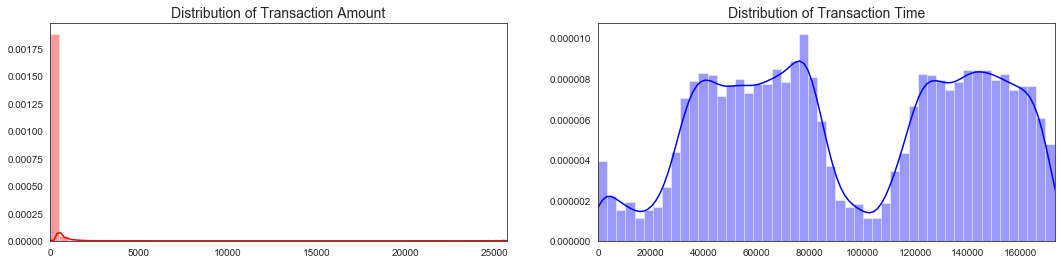

In [13]:
# Creating a distribution plot to observe the distribution of Time and Amount
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = CC_data['Amount'].values
time_val = CC_data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

#### Checking for distributions of Time and Amount with Class

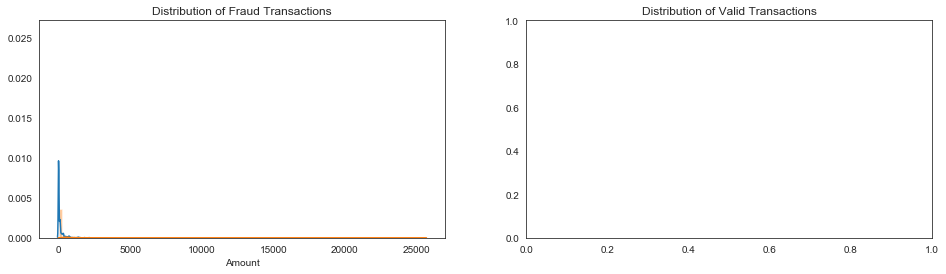

In [14]:
# Creating a distribution plot to observe the distribution of Classes with Amount
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(fraud_data.Amount, bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(valid_data.Amount, bins=100, ax=axs[0])
axs[1].set_title("Distribution of Valid Transactions")

plt.show()

This shows that the fraud transaction is very high for an amount near to 0. We can look into the amount 

In [15]:
print("Fraud Transaction distribution : \n",fraud_data.Amount.value_counts().head())

print("Maximum amount of fraud transaction: ",fraud_data.Amount.max())
print("Minimum amount of fraud transaction: ",fraud_data.Amount.min())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64
Maximum amount of fraud transaction:  2125.87
Minimum amount of fraud transaction:  0.0


- There are 113 fraud transactions for just one dollor and 27 fraud transaction for 99.99 (Dollars). And highest fraud transaction amount was 2125.87 and lowest was just 0.00.
- There are 27 fraud transaction for zero amount. Zero Authorization is an account verification method for credit cards that is used to verify a cardholders information without charging the consumer.

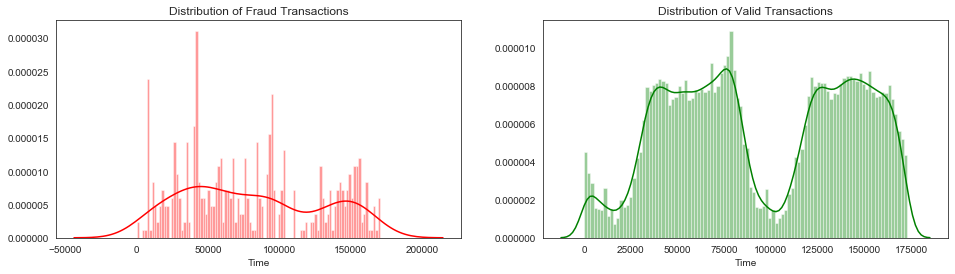

In [16]:
# Creating a distribution plot to observe the distribution of Classes with time
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(fraud_data.Time, bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(valid_data.Time, bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Valid Transactions")

plt.show()

### Distribution of Variables - Checking for Skewness

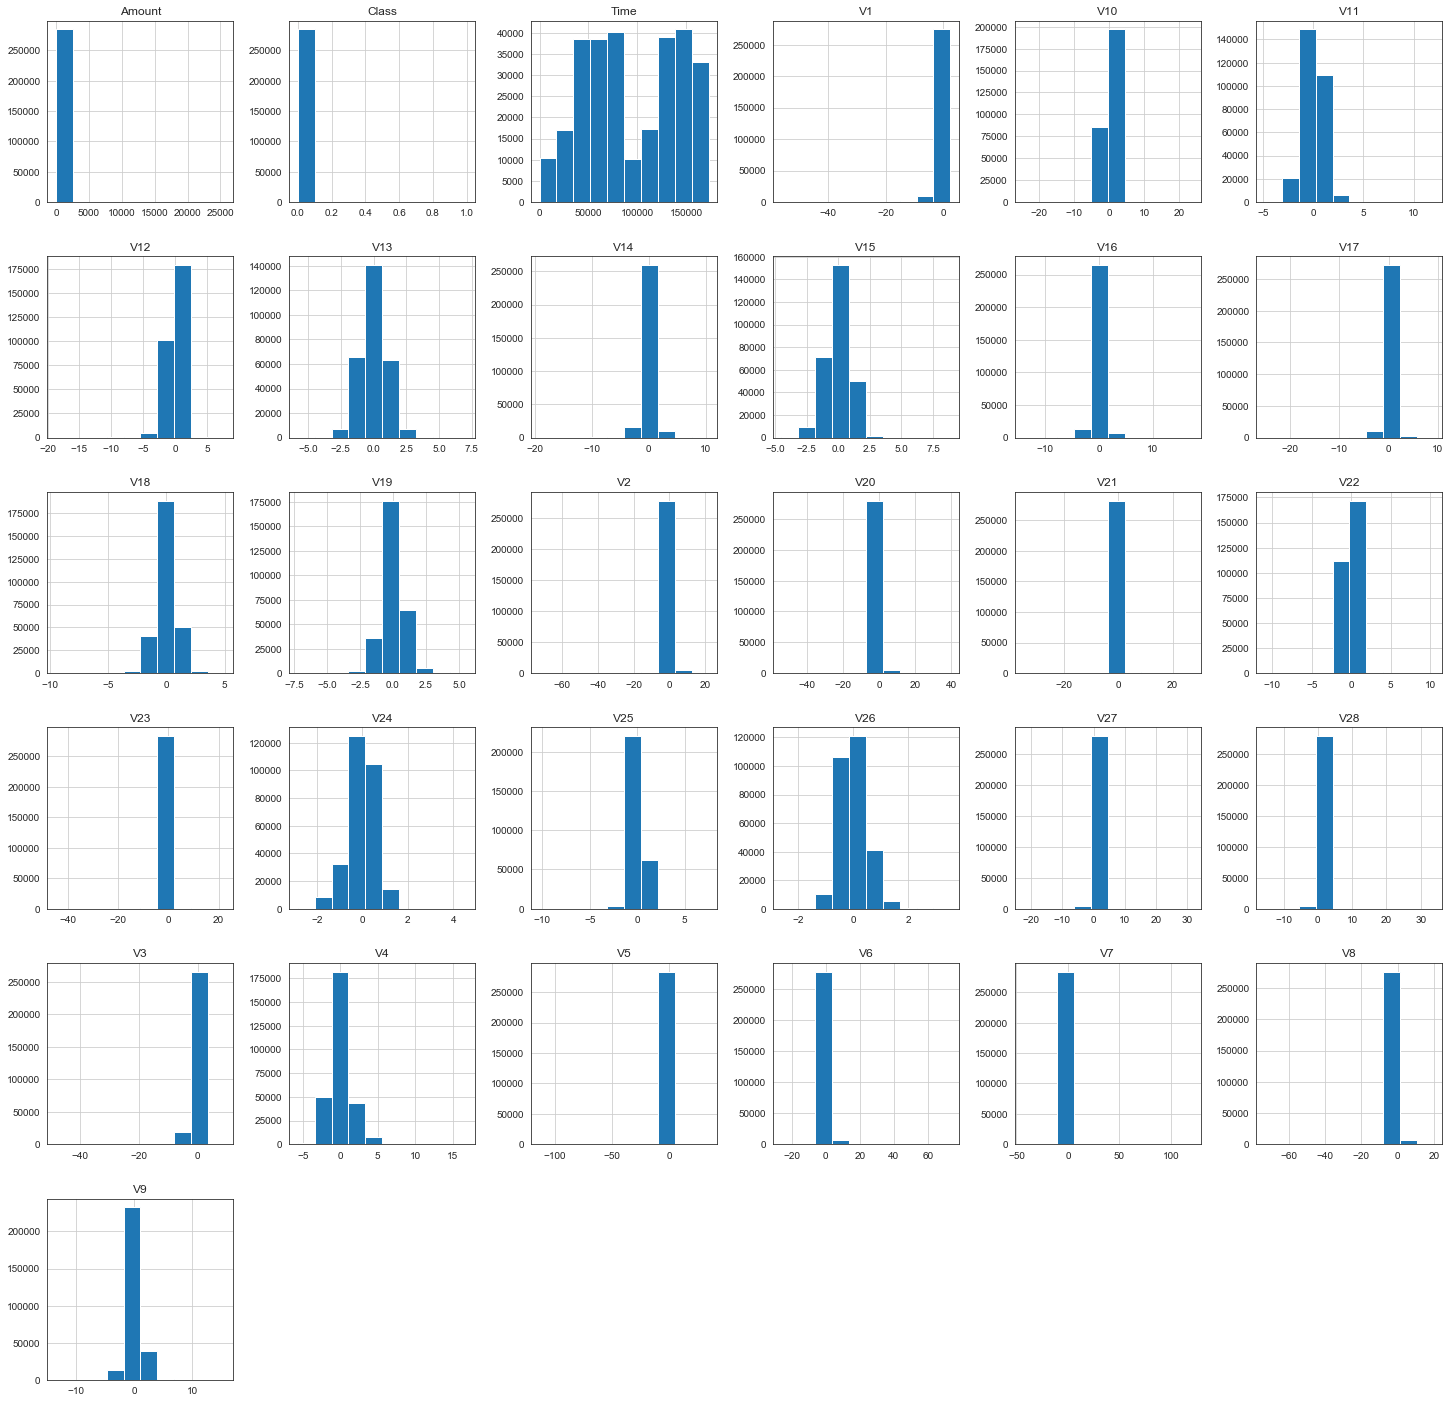

In [17]:
CC_data.hist(figsize = (25,25))
plt.show()

- It is seen that Amount and Time highly skewed data and they are not normalised as per the other features. Let's scale the data.

### Feature Scaling
Scaling `Amount` column using StandardScaler. The amount column is not in line with other features

It is seen that Amount is not normalised as per the other features. Here Time is also not depicting anything that could help us for our current analysis. Hence, we will delete Time feature and scale the Amount Feature

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

CC_data['Amount'] = scaler.fit_transform(CC_data['Amount'].values.reshape(-1,1))

In [19]:
#Dropping Time column as it is not helping in our current analysis.
CC_data = CC_data.drop(['Time'],axis=1)
CC_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [20]:
# Copy the dataset into a back up dataframe for future use
CC_data_copy = CC_data

### Feature Correlation

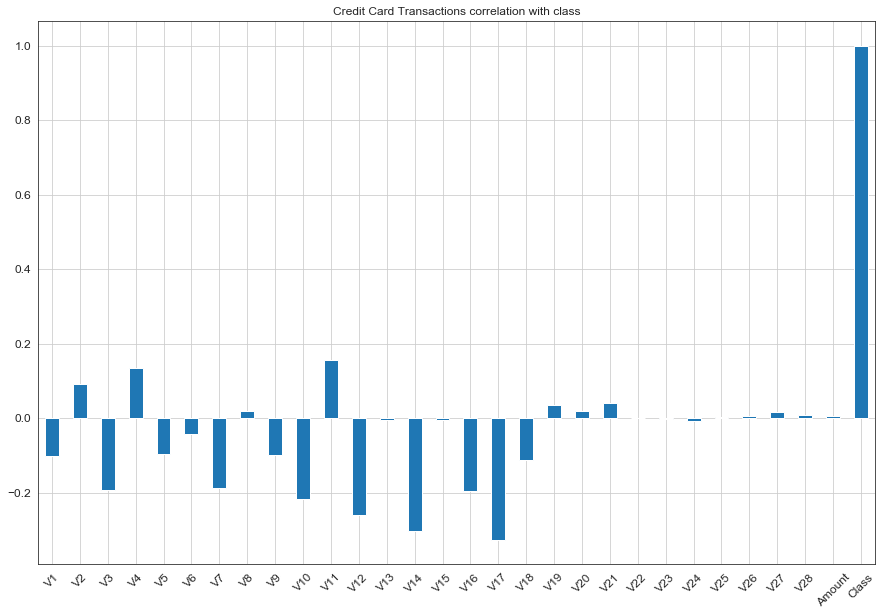

In [21]:
#Checking the correlation of variables with Class variable
CC_data.corrwith(CC_data.Class).plot.bar(figsize = (15, 10), title = "Credit Card Transactions correlation with class", fontsize = 12,
        rot = 45, grid = True)

In the above plot we see that most of the variables are not correlated with each other but there are few features like V10, V12, V14 and V17 which are negatively correlated with Class.

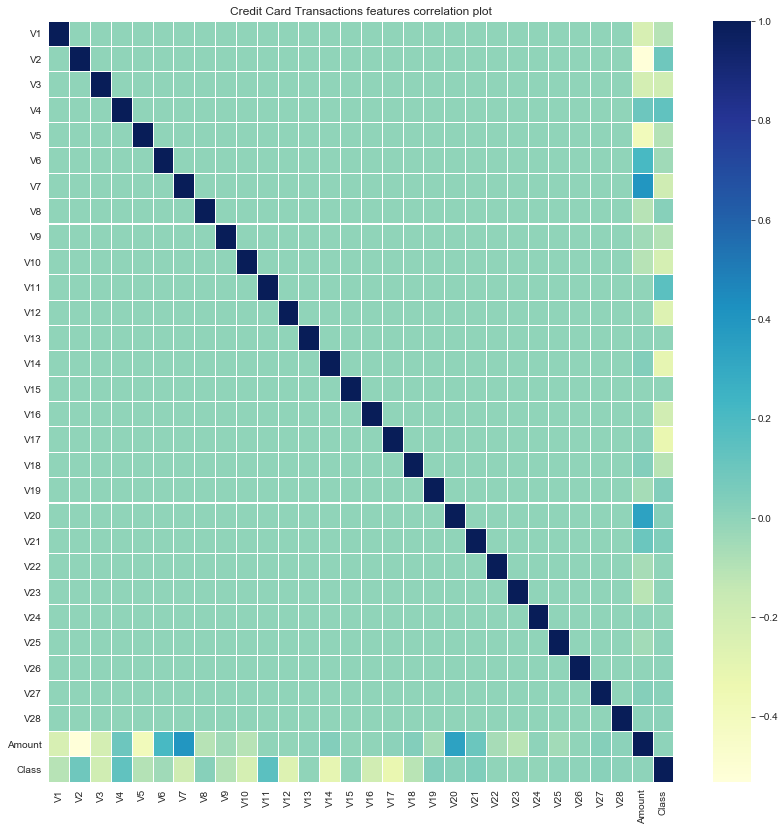

In [22]:
#Checking for the correlation of all variables with each other
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
corr = CC_data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="YlGnBu")
plt.show()

In the HeatMap, most of the variables are not correlated with each other but there are few features like V7 and V20 which are positively correlated with Amount and V2 is highly negatively correlated with Amount.

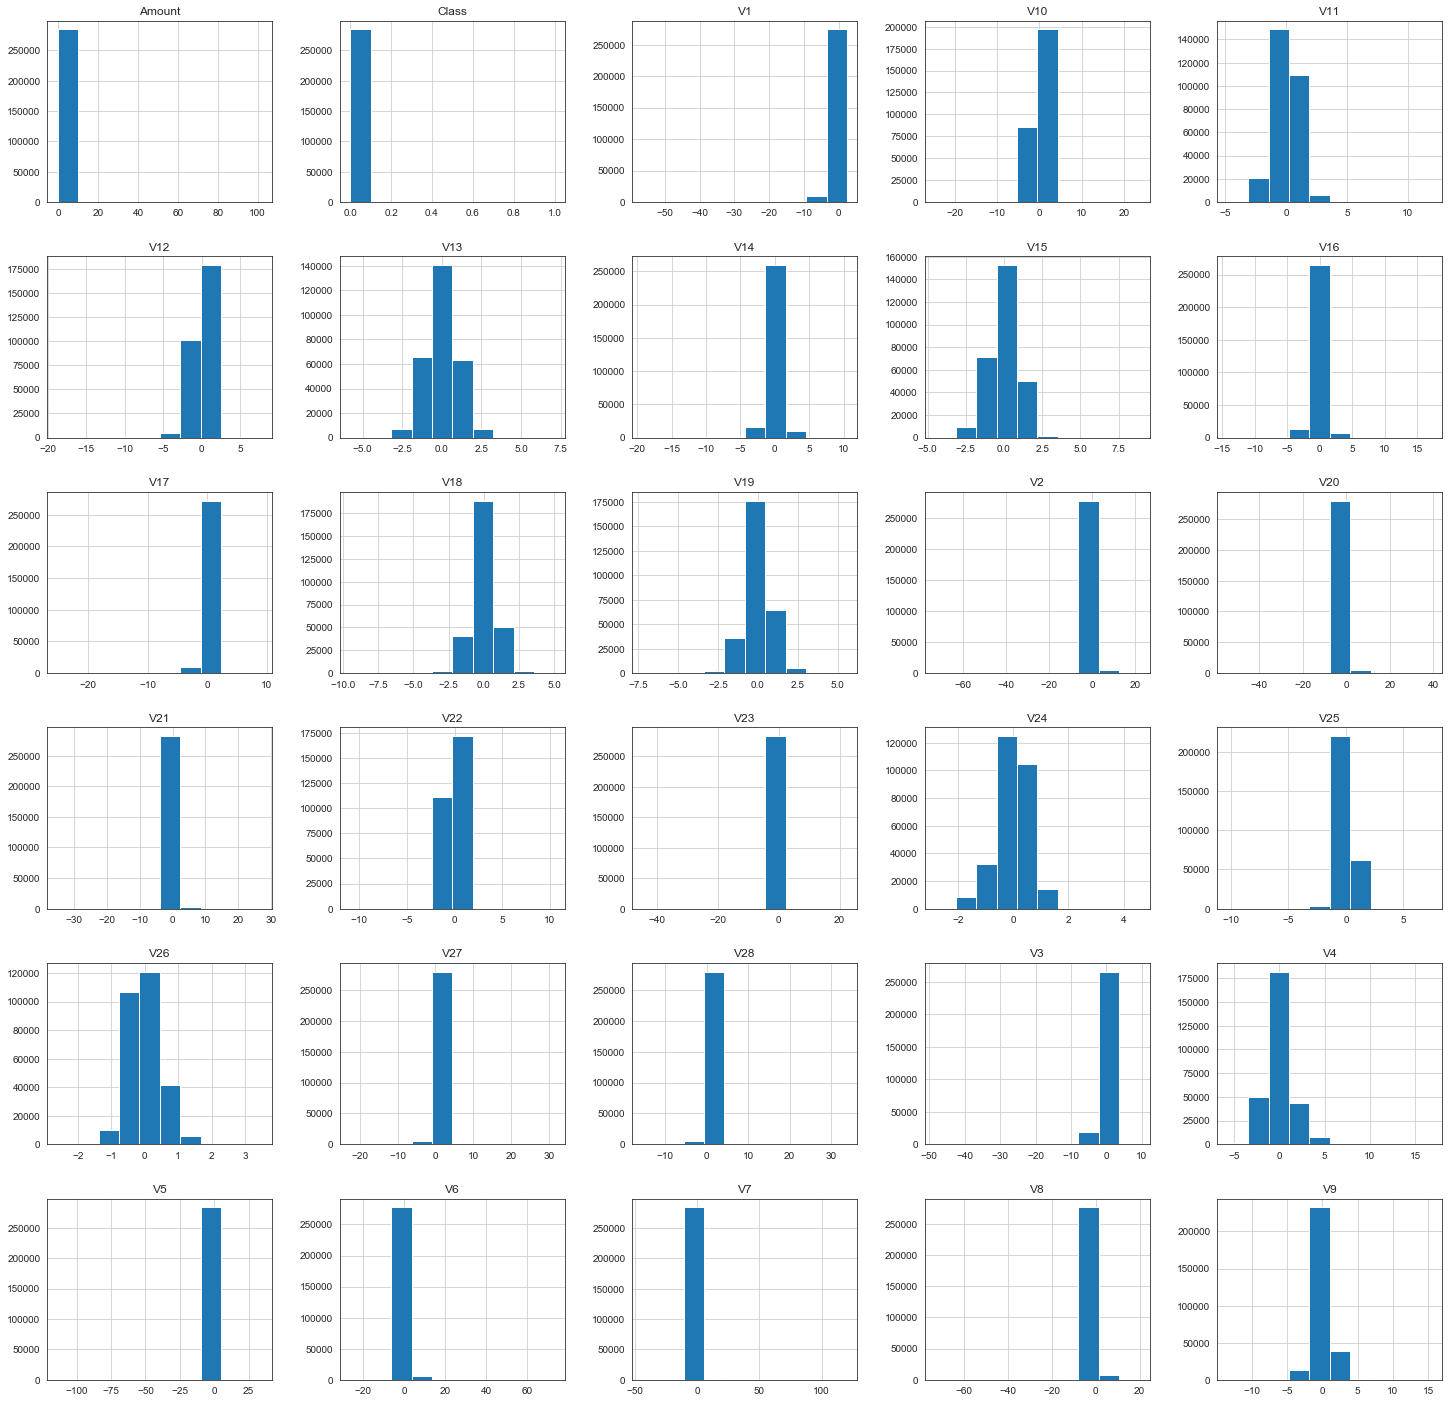

In [23]:
# Rechecking the distribution after scaling the Amount variable
CC_data.hist(figsize = (25,25))
plt.show()

In [24]:
CC_data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [25]:
# Separate Target Variable and Predictor Variables

X = CC_data.drop(['Class'],axis=1)
y = CC_data['Class']

In [26]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


# Model Building

We will be building 6 types of classifier models and decide which classifier will be more effective in detecting fraud transactions.

1. Models - We will be building on both Imbalanced and Balanced dataset and then compare the performance metrics

    - Logistic Regression
    - Decision Trees
    - Random Forest
    - XGBoost
    

2. Imbalance techniques/Solution

    - Random UnderSampling
    - Random OverSampling
    - SMOTE (Synthetic Minority Oversampling Technique)
    

3. Metrics

    - Confusion Matrix
    - Precision Score
    - Recall Score
    - ROC_AUC
    - F1 Score
    

4. Summarise the Best Features based on the optimum metrics

5. Cost Benifit analysis check on the best model/s

6. Give Suggestions to the business

### Libraries to check the performance of the model

In [34]:
# Importing Libraries for classification metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, auc, log_loss, precision_score
from sklearn.metrics import accuracy_score, classification_report, recall_score, roc_curve 
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# Building the models with `Imbalanced Data`

## Splitting the data into Train and Test Dataset

In [28]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split

In [29]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [30]:
#Checking on the dimensions of the train and test data
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)


### Model1: Logistic Regression

In [35]:
# Importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Predict from Test data
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1] #loss
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

In [38]:
# Checking classification scores
print('Metrics:')
print('Accuracy: ', metrics.accuracy_score(y_pred , y_test))
print('log_loss: ', log_loss(y_test, y_pred_proba))
print('Precision: ', metrics.precision_score(y_test , y_pred))
print('Recall: ', metrics.recall_score(y_test , y_pred))
print('F1: ', metrics.f1_score(y_test , y_pred))
print('AUC: ', auc(fpr, tpr))

print('\n')

print('Classification report: \n', metrics.classification_report(y_test, y_pred))

Metrics:
Accuracy:  0.9992158515033414
log_loss:  0.003678835108248407
Precision:  0.8811881188118812
Recall:  0.6180555555555556
F1:  0.7265306122448979
AUC:  0.9804941050500787


Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.88      0.62      0.73       144

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



#### Plotting the ROC Curve

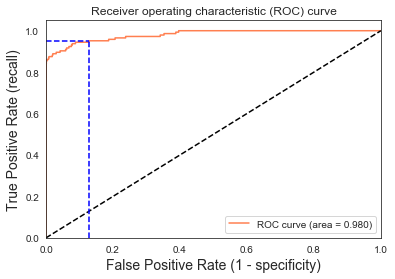

Using a threshold of 0.001 guarantees a sensitivity of 0.951 and a specificity of 0.872, i.e. a false positive rate of 12.79%.


In [39]:
#AUC Plot
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### Hyperparameter Tuning - Grid Search

In [40]:
# GridSearch and RandomisedSearchCV for hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# StratifiedKFold to get the K fold
from sklearn.model_selection import StratifiedKFold

In [41]:
logreg_cv = LogisticRegression()

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.001,0.05,1.1,1.5,2,2.5], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True)

#Running the Model with above chosen parameter
LR_model_imb = GridSearchCV(estimator = logreg_cv, param_grid = parameters , scoring = 'accuracy', cv = folds, n_jobs = -1 , verbose = 2)

In [42]:
# fitting the model using GridSearch
LR_model_imb.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.05, 1.1, 1.5, 2, 2.5],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [44]:
# print best hyperparameters
print("Best AUC: ", LR_model_imb.best_score_)
best_lr_params = LR_model_imb.best_params_
print("Best hyperparameters: ", best_lr_params)

Best AUC:  0.9991071602176398
Best hyperparameters:  {'C': 0.05, 'penalty': 'l2'}


As the best Hyper parameter turns out to be C = 0.05 and penalty = 'l2'. Building the model with the these optimum Hyper-parameters

### Running the model with best parameters obtained from grid search

In [45]:
# Making the Final Classification model.
lr_imb = LogisticRegression(C = 0.05, penalty = 'l2')
lr_imb.fit(X_train, y_train)

LogisticRegression(C=0.05)

### Predicting the Train Dataset results and calculating the accuracy

In [46]:
y_pred_train = lr_imb.predict(X_train)

#### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [47]:
# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_train,y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train, y_pred_train)}')
print('\n')
print("F1 score:",metrics.f1_score(y_train, y_pred_train))
print("Recall:",metrics.recall_score(y_train, y_pred_train))
print("Precision:",metrics.precision_score(y_train, y_pred_train))

Accuracy Score: 0.9991523043277623
Confusion Matrix: 
[[198985     31]
 [   138    210]]
Area Under Curve: 0.801646254745763


F1 score: 0.7130730050933786
Recall: 0.603448275862069
Precision: 0.8713692946058091


### Predicting the Test Dataset results and calculating the accuracy

In [48]:
y_pred = lr_imb.predict(X_test)

#### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [49]:
# Performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy Score: 0.9992158515033414
Confusion Matrix: 
[[85288    11]
 [   56    88]]
Area Under Curve: 0.8054910764878057


F1 score: 0.7242798353909464
Recall: 0.6111111111111112
Precision: 0.8888888888888888



<b>The AUC for both Train and Test dataset that is on an imbalanced dataset is almost the same.

1. The Area Under Curve for Train Dataset - 0.805
2. The Area Under Curve for Test Dataset - 0.808

This means that the model is good. We can now look into balancing the data and checking the AUC for both Train and Test Dataset</b>


### Model2: Decision Tree

In [50]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier 

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
# Making predictions
y_pred_dt = dt_classifier.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.74      0.79      0.77       144

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [52]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_dt))
print("Accuracy Score: ", accuracy_score(y_test,y_pred_dt))

[[85259    40]
 [   30   114]]
Accuracy Score:  0.9991807403766253


### Hyperparameter Tuning - Grid Search

In [54]:
# Create the parameter grid 
param_grid = {
    'max_depth': list(range(2,4,1)),
    'min_samples_leaf': list(range(5,7,1)),
    'min_samples_split': list(range(5,7,1)),
    'criterion': ["entropy", "gini"]
}

#n_folds = 5
# create 5 folds
n_folds = StratifiedKFold(n_splits = 5, shuffle = True)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
dtree_gridsearch = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1)

# Fit the grid search to the data
dtree_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [5, 6]},
             verbose=1)

In [55]:
# Checking for the best parameters
best_parameters = dtree_gridsearch.best_estimator_
print('The best parameters for using this model is', best_parameters)
print("best accuracy", dtree_gridsearch.best_score_)

The best parameters for using this model is DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=5)
best accuracy 0.9993027829500315


### Running the model with best parameters obtained from grid search

In [56]:
# model with optimal hyperparameters
dt_Classifier_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=6,
                                  min_samples_split=5)
dt_Classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,
                       min_samples_split=5, random_state=100)

### Predicting the Train Dataset results and calculating the accuracy

In [57]:
y_pred_train = dt_Classifier_entropy.predict(X_train)

#### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [58]:
print("Classification Report: \n", classification_report(y_train, y_pred_train))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.82      0.82      0.82       348

    accuracy                           1.00    199364
   macro avg       0.91      0.91      0.91    199364
weighted avg       1.00      1.00      1.00    199364



In [59]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train,y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train, y_pred_train))
print("Recall:",metrics.recall_score(y_train, y_pred_train))
print("Precision:",metrics.precision_score(y_train, y_pred_train))

Accuracy Score: 0.9993830380610341
Confusion Matrix: 
[[198954     62]
 [    61    287]]
Area Under Curve: 0.9122005554685374


F1 score: 0.823529411764706
Recall: 0.8247126436781609
Precision: 0.8223495702005731


### Predicting the Test Dataset results and calculating the accuracy

In [60]:
y_pred_test = dt_Classifier_entropy.predict(X_test)

#### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [61]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.81      0.81      0.81       144

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [62]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))

Accuracy Score: 0.9993562960102056
Confusion Matrix: 
[[85272    27]
 [   28   116]]
Area Under Curve: 0.9026195109751188


F1 score: 0.8083623693379791
Recall: 0.8055555555555556
Precision: 0.8111888111888111


<b>The AUC for both Train and Test dataset that is on an imbalanced dataset is almost the same.

1. The Area Under Curve for Train Dataset - 0.912
2. The Area Under Curve for Test Dataset - 0.902

This means that the model is good. We can now look into balancing the data and checking the AUC for both Train and Test Dataset</b>


### Model3: Random Forest

In [63]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
# Making predictions
y_pred_rf = rfc.predict(X_test)

# Let's check the report of our default model
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.94      0.81      0.87       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [65]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_rf))
print("Accuracy Score: ", accuracy_score(y_test,y_pred_rf))

[[85292     7]
 [   28   116]]
Accuracy Score:  0.9995903701883126


### Hyperparameter Tuning - Grid Search

In [66]:
# Create a based model
rf = RandomForestClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [10, 25],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,20],
    'criterion' :['gini', 'entropy']
}

# Instantiate the grid search model
rf_gridSearch = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5 ,n_jobs = -1,verbose = 1)

# Fit the grid search to the data
rf_gridSearch.fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 28.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 25]},
             verbose=1)

In [67]:
# Checking for the best parameters
best_parameters = rf_gridSearch.best_params_
print('The best parameters for using this model is', best_parameters)
print("Accuracy", rf_gridSearch.best_score_)

The best parameters for using this model is {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 25}
Accuracy 0.9995335175385129


### Running the model with best parameters obtained from grid search

In [68]:
rfc=RandomForestClassifier(max_features='log2', n_estimators= 25, max_depth=20, criterion='entropy')
#Fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=25)

### Predicting the Train Dataset results and calculating the accuracy

In [69]:
y_pred_train = rfc.predict(X_train)

#### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [70]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      0.99      0.99       348

    accuracy                           1.00    199364
   macro avg       1.00      0.99      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [71]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train, y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train, y_pred_train))
print("Recall:",metrics.recall_score(y_train, y_pred_train))
print("Precision:",metrics.precision_score(y_train, y_pred_train))

Accuracy Score: 0.9999749202463835
Confusion Matrix: 
[[199016      0]
 [     5    343]]
Area Under Curve: 0.992816091954023


F1 score: 0.9927641099855282
Recall: 0.985632183908046
Precision: 1.0


### Predicting the Test Dataset results and calculating the accuracy

In [72]:
y_pred_test = rfc.predict(X_test)

#### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [73]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.95      0.78      0.86       144

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [74]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))

Accuracy Score: 0.9995669627705019
Confusion Matrix: 
[[85293     6]
 [   31   113]]
Area Under Curve: 0.8923259407105203


F1 score: 0.8593155893536122
Recall: 0.7847222222222222
Precision: 0.9495798319327731


<b>The AUC for both Train and Test dataset that is on an imbalanced dataset is varying from each other.

1. The Area Under Curve for Train Dataset - 0.991
2. The Area Under Curve for Test Dataset - 0.895
</b>


In [75]:
# AS the Dataset is large taking Partial dataset for fitting the model
X1_train = X_train[:60000]
y1_train = y_train[:60000]
X1_test = X_test[60000:]
y1_test = y_test[60000:]

### Model4: XGBoost

In [76]:
# Importing XGBoost Classifier library
from xgboost import XGBClassifier

In [77]:
XGB = XGBClassifier()
kfold = StratifiedKFold(n_splits=3, random_state=42)

# use area under the precision-recall curve to show classification accuracy
scoring = 'roc_auc'
results = cross_val_score(XGB, X1_train, y1_train, cv=kfold, scoring = scoring)
print( "AUC: %.3f (%.3f)" % (results.mean(), results.std()) )

AUC: 0.975 (0.024)


### Hyperparameter Tuning - Grid Search

In [78]:
# Create a based model
xgb_model = XGBClassifier()

# Create the parameter grid based on the results of random search 
param_tuning = {
    'learning_rate': [0.05, 0.1,0.2,0.3,0.5],
    'max_depth': range(1, 11, 2),
    'colsample_bytree': [0.3,0.5, 0.7],
    'gamma': [0,0.2,0.3],
    'min_child_weight' : [1,3,5,7],
    'n_estimators' : [10, 25, 50]
    }

folds = StratifiedKFold(n_splits =3, shuffle = True, random_state = 0)

# Instantiate the grid search model
xgb_gsearch = GridSearchCV(estimator = xgb_model,param_grid = param_tuning, scoring= 'roc_auc', cv = folds,return_train_score = True, n_jobs = -1, verbose = 1)

# Fit the grid search to the data
xgb_gsearch.fit(X1_train,y1_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 47.6min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 58.2min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'gamma': [0, 0.2, 0.3],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': range(1, 11, 2),
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [10, 25, 50]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [79]:
# summarize results
print("Best AUC: %f using %s" % (xgb_gsearch.best_score_, xgb_gsearch.best_params_))

Best AUC: 0.981679 using {'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50}


### Running the model with best parameters obtained from grid search

In [80]:
XGB_model = XGBClassifier(colsample_bytree = 0.3, gamma =0, learning_rate = 0.2, max_depth = 7, min_child_weight =1, n_estimators = 50)
#Fit the model on the original train dataset not the partial dataset (X_Train and y_train)
XGB_model.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.3, learning_rate=0.2, max_depth=7,
              n_estimators=50)

### Predicting the Train Dataset results and calculating the accuracy

In [81]:
y_pred_train = XGB_model.predict(X_train)

#### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [82]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      0.91      0.95       348

    accuracy                           1.00    199364
   macro avg       1.00      0.96      0.98    199364
weighted avg       1.00      1.00      1.00    199364



In [83]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train, y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train, y_pred_train))
print("Recall:",metrics.recall_score(y_train, y_pred_train))
print("Precision:",metrics.precision_score(y_train, y_pred_train))

Accuracy Score: 0.999849521478301
Confusion Matrix: 
[[199016      0]
 [    30    318]]
Area Under Curve: 0.9568965517241379


F1 score: 0.9549549549549551
Recall: 0.9137931034482759
Precision: 1.0


### Predicting the Test Dataset results and calculating the accuracy

In [84]:
y_pred_test = XGB_model.predict(X_test)

#### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [85]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.93      0.78      0.85       144

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [86]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))

Accuracy Score: 0.9995435553526912
Confusion Matrix: 
[[85291     8]
 [   31   113]]
Area Under Curve: 0.8923142172436567


F1 score: 0.8528301886792454
Recall: 0.7847222222222222
Precision: 0.9338842975206612


<b>The AUC for both Train and Test dataset that is on an imbalanced dataset.

1. The Area Under Curve for Train Dataset - 0.956
2. The Area Under Curve for Test Dataset - 0.892

This means that the model is good. We can now look into balancing the data and checking the AUC for both Train and Test Dataset</b>

**Now let us Balance the data and check for the metrics for all the models and select the best model basis the optimum metrics**

# Building the models with `Balanced Data`

There is a disproportionate ratio of observations in target variable (Class) in this dataset. We will be using the below techniques to balance the dataset and compare the AUC results.

1. Random Undersampling
2. Random Oversampling
3. SMOTE (Synthetic Minority Over-sampling Technique)

### Importing balancing technique algorithm

In [87]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## Building Models with <u>Random Undersampling Technique</u>

In [88]:
# Implementing Undersampling on original X and y data (seprated the main dataset to Target Variable and Predictor Variables)
# before splitting to train and test data

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

## Splitting the data into Train and Test Dataset

In [89]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, shuffle=True, random_state=0)

In [90]:
#Checking on the dimensions of the train and test data
print("X_train - ",X_train_rus.shape)
print("y_train - ",y_train_rus.shape)
print("X_test - ",X_test_rus.shape)
print("y_test - ",y_test_rus.shape)

X_train -  (688, 29)
y_train -  (688,)
X_test -  (296, 29)
y_test -  (296,)


### Model1: Logistic Regression

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

LogisticRegression()

In [92]:
# Predict from Test data
y_pred = logreg.predict(X_test_rus)
y_pred_proba = logreg.predict_proba(X_test_rus)[:, 1] #loss
[fpr, tpr, thr] = roc_curve(y_test_rus, y_pred_proba)

In [93]:
# Checking classification scores
print('Metrics:')
print('Accuracy: ', metrics.accuracy_score(y_pred , y_test_rus))
print('log_loss: ', log_loss(y_test_rus, y_pred_proba))
print('Precision: ', metrics.precision_score(y_test_rus , y_pred))
print('Recall: ', metrics.recall_score(y_test_rus , y_pred))
print('F1: ', metrics.f1_score(y_test_rus , y_pred))
print('AUC: ', auc(fpr, tpr))

print('\n')

print('Classification report: \n', metrics.classification_report(y_test_rus, y_pred))

Metrics:
Accuracy:  0.9425675675675675
log_loss:  0.15264322119529103
Precision:  0.9647887323943662
Recall:  0.9194630872483222
F1:  0.9415807560137458
AUC:  0.9802310185819295


Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       147
           1       0.96      0.92      0.94       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



#### Plotting the ROC Curve

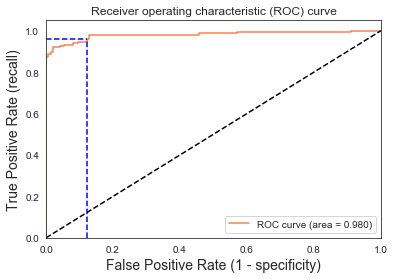

Using a threshold of 0.193 guarantees a sensitivity of 0.960 and a specificity of 0.878, i.e. a false positive rate of 12.24%.


In [94]:
#AUC Plot
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### Hyperparameter Tuning - Grid Search

In [95]:
logreg_cv = LogisticRegression()

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.001,0.05,1.1,1.5,2,2.5], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True)

#Running the Model with above chosen parameter
lr_model = GridSearchCV(estimator = logreg_cv, param_grid = parameters , scoring = 'accuracy', cv = folds, n_jobs = -1 , verbose = 2)

In [96]:
# fitting the model using GridSearch
lr_model.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.05, 1.1, 1.5, 2, 2.5],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [97]:
# print best hyperparameters
print("Best AUC: ", lr_model.best_score_)
best_lr_params = lr_model.best_params_
print("Best hyperparameters: ", best_lr_params)

Best AUC:  0.9403364011424944
Best hyperparameters:  {'C': 0.05, 'penalty': 'l2'}


As the best Hyper parameter turns out to be C = 0.05 and penalty = 'l2'. Building the model with the these optimum Hyper-parameters

In [98]:
# Making the Final Classification model.
lr = LogisticRegression(C = 0.05, penalty = 'l2')
lr.fit(X_train_rus, y_train_rus)

LogisticRegression(C=0.05)

### Predicting the Train Dataset results and calculating the accuracy

In [99]:
y_pred_train = lr.predict(X_train_rus)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [100]:
# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_train_rus,y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_rus, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_rus, y_pred_train)}')
print('\n')
print("F1 score:",metrics.f1_score(y_train_rus, y_pred_train))
print("Recall:",metrics.recall_score(y_train_rus, y_pred_train))
print("Precision:",metrics.precision_score(y_train_rus, y_pred_train))

Accuracy Score: 0.9505813953488372
Confusion Matrix: 
[[342   3]
 [ 31 312]]
Area Under Curve: 0.9504626695398657


F1 score: 0.9483282674772036
Recall: 0.9096209912536443
Precision: 0.9904761904761905


### Predicting the Test Dataset results and calculating the accuracy

In [101]:
y_pred = lr.predict(X_test_rus)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [102]:
# Performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test_rus,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_rus, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test_rus, y_pred)}')
print('\n')
print("F1 score:",metrics.f1_score(y_test_rus, y_pred))
print("Recall:",metrics.recall_score(y_test_rus, y_pred))
print("Precision:",metrics.precision_score(y_test_rus, y_pred))

Accuracy Score: 0.9391891891891891
Confusion Matrix: 
[[146   1]
 [ 17 132]]
Area Under Curve: 0.9395516595900105


F1 score: 0.9361702127659575
Recall: 0.8859060402684564
Precision: 0.9924812030075187


<b>The AUC for both Train and Test dataset that is on an balanced dataset is almost the same.

- The Area Under Curve for Train Dataset - 0.950
- The Area Under Curve for Test Dataset - 0.939
    
This means that the model is good.</b> 

### Model2: Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier 

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier()

In [104]:
# Making predictions
y_pred_dt = dt_classifier.predict(X_test_rus)

# Printing classification report
print(classification_report(y_test_rus, y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       147
           1       0.90      0.86      0.88       149

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296



In [105]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test_rus,y_pred_dt))
print("Accuracy Score: ", accuracy_score(y_test_rus,y_pred_dt))

[[132  15]
 [ 21 128]]
Accuracy Score:  0.8783783783783784


### Hyperparameter Tuning - Grid Search

In [106]:
# Create the parameter grid 
param_grid = {
    'max_depth': list(range(2,4,1)),
    'min_samples_leaf': list(range(5,7,1)),
    'min_samples_split': list(range(5,7,1)),
    'criterion': ["entropy", "gini"]
}

#n_folds = 5
# create 5 folds
n_folds = StratifiedKFold(n_splits = 5, shuffle = True)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
dtree_gridsearch = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1)

# Fit the grid search to the data
dtree_gridsearch.fit(X_train_rus,y_train_rus)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [5, 6]},
             verbose=1)

In [107]:
# Checking for the best parameters
best_parameters = dtree_gridsearch.best_estimator_
print('The best parameters for using this model is', best_parameters)
print("best accuracy", dtree_gridsearch.best_score_)

The best parameters for using this model is DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5)
best accuracy 0.9302655241722203


### Running the model with best parameters obtained from grid search

In [108]:
# model with optimal hyperparameters
dt_Classifier_entropy = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=3, 
                                  min_samples_leaf=5,
                                  min_samples_split=6)
dt_Classifier_entropy.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=6)

### Predicting the Train Dataset results and calculating the accuracy

In [109]:
y_pred_train = dt_Classifier_entropy.predict(X_train_rus)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [110]:
print("Classification Report: \n", classification_report(y_train_rus, y_pred_train))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       345
           1       0.99      0.90      0.94       343

    accuracy                           0.95       688
   macro avg       0.95      0.95      0.95       688
weighted avg       0.95      0.95      0.95       688



In [111]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train_rus,y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_rus, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_rus, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train_rus, y_pred_train))
print("Recall:",metrics.recall_score(y_train_rus, y_pred_train))
print("Precision:",metrics.precision_score(y_train_rus, y_pred_train))

Accuracy Score: 0.9476744186046512
Confusion Matrix: 
[[343   2]
 [ 34 309]]
Area Under Curve: 0.9475387670596189


F1 score: 0.944954128440367
Recall: 0.9008746355685131
Precision: 0.9935691318327974


### Predicting the Test Dataset results and calculating the accuracy

In [112]:
y_pred_test = dt_Classifier_entropy.predict(X_test_rus)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [113]:
print(classification_report(y_test_rus, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       147
           1       1.00      0.85      0.92       149

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296



In [114]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test_rus, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_rus, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test_rus, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test_rus, y_pred_test))
print("Recall:",metrics.recall_score(y_test_rus, y_pred_test))
print("Precision:",metrics.precision_score(y_test_rus, y_pred_test))

Accuracy Score: 0.9256756756756757
Confusion Matrix: 
[[147   0]
 [ 22 127]]
Area Under Curve: 0.9261744966442953


F1 score: 0.9202898550724637
Recall: 0.8523489932885906
Precision: 1.0


<b>The AUC for both Train and Test dataset that is on an balanced dataset is almost the same.

- The Area Under Curve for Train Dataset - 0.947
- The Area Under Curve for Test Dataset - 0.926

This means that the model is good.</b>

### Model3: Random Forest

In [115]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_rus,y_train_rus)

RandomForestClassifier()

In [116]:
# Making predictions
y_pred_rf = rfc.predict(X_test_rus)

# Let's check the report of our default model
print(classification_report(y_test_rus,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       147
           1       1.00      0.88      0.94       149

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



In [117]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test_rus,y_pred_rf))
print("Accuracy Score: ", accuracy_score(y_test_rus,y_pred_rf))

[[147   0]
 [ 18 131]]
Accuracy Score:  0.9391891891891891


### Hyperparameter Tuning - Grid Search

In [118]:
# Create a based model
rf = RandomForestClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [10, 25],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,20],
    'criterion' :['gini', 'entropy']
}

# Instantiate the grid search model
rf_gridSearch = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5 ,n_jobs = -1,verbose = 1)

# Fit the grid search to the data
rf_gridSearch.fit(X_train_rus,y_train_rus)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:    4.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.7s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 25]},
             verbose=1)

In [119]:
# Checking for the best parameters
best_parameters = rf_gridSearch.best_params_
print('The best parameters for using this model is', best_parameters)
print("Accuracy", rf_gridSearch.best_score_)

The best parameters for using this model is {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 25}
Accuracy 0.94038789428815


### Running the model with best parameters obtained from grid search

In [120]:
rfc=RandomForestClassifier(max_features='auto', n_estimators= 25, max_depth=20, criterion='entropy')
#Fit the model
rfc.fit(X_train_rus,y_train_rus)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=25)

### Predicting the Train Dataset results and calculating the accuracy

In [121]:
y_pred_train = rfc.predict(X_train_rus)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [122]:
print(classification_report(y_train_rus, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       345
           1       1.00      0.99      1.00       343

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688



In [123]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train_rus, y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_rus, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_rus, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train_rus, y_pred_train))
print("Recall:",metrics.recall_score(y_train_rus, y_pred_train))
print("Precision:",metrics.precision_score(y_train_rus, y_pred_train))

Accuracy Score: 0.997093023255814
Confusion Matrix: 
[[345   0]
 [  2 341]]
Area Under Curve: 0.9970845481049563


F1 score: 0.9970760233918129
Recall: 0.9941690962099126
Precision: 1.0


### Predicting the Test Dataset results and calculating the accuracy

In [124]:
y_pred_test = rfc.predict(X_test_rus)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [125]:
print(classification_report(y_test_rus, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       147
           1       0.99      0.89      0.94       149

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



In [126]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test_rus, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_rus, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test_rus, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test_rus, y_pred_test))
print("Recall:",metrics.recall_score(y_test_rus, y_pred_test))
print("Precision:",metrics.precision_score(y_test_rus, y_pred_test))

Accuracy Score: 0.9425675675675675
Confusion Matrix: 
[[146   1]
 [ 16 133]]
Area Under Curve: 0.9429073642879972


F1 score: 0.9399293286219081
Recall: 0.8926174496644296
Precision: 0.9925373134328358


<b>The AUC for both Train and Test dataset that is on balanced dataset is almost the same

- The Area Under Curve for Train Dataset - 0.995
- The Area Under Curve for Test Dataset - 0.926</b>

### Model4: XGBoost

In [127]:
# Importing XGBoost Classifier library
from xgboost import XGBClassifier

XGB = XGBClassifier()

kfold = StratifiedKFold(n_splits=10, random_state=42)

# use area under the precision-recall curve to show classification accuracy
scoring = 'roc_auc'
results = cross_val_score(XGB, X_train_rus, y_train_rus, cv=kfold, scoring = scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.977 (0.016)


### Hyperparameter Tuning - Grid Search

In [128]:
# Create a based model
xgb_model = XGBClassifier()

# Create the parameter grid based on the results of random search 
param_tuning = {
    'learning_rate': [0.05, 0.1,0.2,0.3,0.5],
    'max_depth': range(1, 11, 2),
    'colsample_bytree': [0.3,0.5, 0.7],
    'gamma': [0,0.2,0.3],
    'min_child_weight' : [1,3,5,7],
    'n_estimators' : [10, 25, 50]
    }

folds = StratifiedKFold(n_splits =3, shuffle = True, random_state = 0)

# Instantiate the grid search model
xgb_gsearch = GridSearchCV(estimator = xgb_model,param_grid = param_tuning, scoring= 'roc_auc', cv = folds,return_train_score = True, n_jobs = -1, verbose = 1)

# Fit the grid search to the data
xgb_gsearch.fit(X_train_rus,y_train_rus)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 12128 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 13500 out of 13500 | elapsed:  2.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'gamma': [0, 0.2, 0.3],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': range(1, 11, 2),
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [10, 25, 50]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [129]:
# summarize results
print("Best AUC: %f using %s" % (xgb_gsearch.best_score_, xgb_gsearch.best_params_))

Best AUC: 0.981791 using {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 25}


### Running the model with best parameters obtained from grid search

In [130]:
XGB_model = XGBClassifier(colsample_bytree = 0.5, gamma =0.2, learning_rate = 0.2, max_depth = 3, min_child_weight =1, n_estimators = 25)
#Fit the model
XGB_model.fit(X_train_rus,y_train_rus)

XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.2,
              n_estimators=25)

### Predicting the Train Dataset results and calculating the accuracy

In [131]:
y_pred_train = XGB_model.predict(X_train_rus)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [132]:
print(classification_report(y_train_rus, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       345
           1       1.00      0.97      0.98       343

    accuracy                           0.98       688
   macro avg       0.98      0.98      0.98       688
weighted avg       0.98      0.98      0.98       688



In [133]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train_rus, y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_rus, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_rus, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train_rus, y_pred_train))
print("Recall:",metrics.recall_score(y_train_rus, y_pred_train))
print("Precision:",metrics.precision_score(y_train_rus, y_pred_train))

Accuracy Score: 0.9825581395348837
Confusion Matrix: 
[[345   0]
 [ 12 331]]
Area Under Curve: 0.9825072886297377


F1 score: 0.9821958456973293
Recall: 0.9650145772594753
Precision: 1.0


### Predicting the Test Dataset results and calculating the accuracy

In [134]:
y_pred_test = XGB_model.predict(X_test_rus)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [135]:
print(classification_report(y_test_rus, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       147
           1       0.97      0.90      0.93       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [136]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test_rus, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_rus, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test_rus, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test_rus, y_pred_test))
print("Recall:",metrics.recall_score(y_test_rus, y_pred_test))
print("Precision:",metrics.precision_score(y_test_rus, y_pred_test))

Accuracy Score: 0.9358108108108109
Confusion Matrix: 
[[143   4]
 [ 15 134]]
Area Under Curve: 0.9360589873533306


F1 score: 0.9337979094076655
Recall: 0.8993288590604027
Precision: 0.9710144927536232


<b>The AUC for both Train and Test dataset that is on balanced dataset looks almost same.

- The Area Under Curve for Train Dataset - 0.982
- The Area Under Curve for Test Dataset - 0.936
    
We can check the AUC on balanced dataset </b>

## Building Models with <u>Random Oversampling Technique</u>

In [137]:
# Implementing Oversampling on original X and y data (seprated the main dataset to Target Variable and Predictor Variables)
# before splitting to train and test data

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

### Splitting the data into Train and Test Dataset

In [138]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, shuffle=True, random_state=0)

In [139]:
#Checking on the dimensions of the train and test data
print("X_train - ",X_train_ros.shape)
print("y_train - ",y_train_ros.shape)
print("X_test - ",X_test_ros.shape)
print("y_test - ",y_test_ros.shape)

X_train -  (398041, 29)
y_train -  (398041,)
X_test -  (170589, 29)
y_test -  (170589,)


### Model1: Logistic Regression

In [140]:
# Importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

LogisticRegression()

In [141]:
# Predict from Test data
y_pred = logreg.predict(X_test_ros)

y_pred_proba = logreg.predict_proba(X_test_ros)[:, 1] #loss
[fpr, tpr, thr] = roc_curve(y_test_ros, y_pred_proba)

In [142]:
# Checking classification scores
print('Metrics:')
print('Accuracy: ', metrics.accuracy_score(y_pred , y_test_ros))
print('log_loss: ', log_loss(y_test_ros, y_pred_proba))
print('Precision: ', metrics.precision_score(y_test_ros , y_pred))
print('Recall: ', metrics.recall_score(y_test_ros , y_pred))
print('F1: ', metrics.f1_score(y_test_ros , y_pred))
print('AUC: ', auc(fpr, tpr))

print('\n')

print('Classification report: \n', metrics.classification_report(y_test_ros, y_pred))

Metrics:
Accuracy:  0.9483554039240514
log_loss:  0.13712211445862293
Precision:  0.9748701355053867
Recall:  0.9205895781870119
F1:  0.9469526367128698
AUC:  0.9865152847675884


Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     85172
           1       0.97      0.92      0.95     85417

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



#### Plotting the ROC Curve

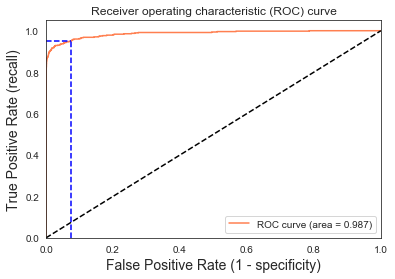

Using a threshold of 0.246 guarantees a sensitivity of 0.950 and a specificity of 0.927, i.e. a false positive rate of 7.31%.


In [143]:
#AUC Plot
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### Hyperparameter Tuning - Grid Search

In [144]:
logreg_cv = LogisticRegression()

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.001,0.05,1.1,1.5,2,2.5], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True)

#Running the Model with above chosen parameter
lr_model = GridSearchCV(estimator = logreg_cv, param_grid = parameters , scoring = 'accuracy', cv = folds, n_jobs = -1 , verbose = 2)

In [145]:
# fitting the model using GridSearch
lr_model.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   27.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.05, 1.1, 1.5, 2, 2.5],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [146]:
# print best hyperparameters
print("Best AUC: ", lr_model.best_score_)
best_lr_params = lr_model.best_params_
print("Best hyperparameters: ", best_lr_params)

Best AUC:  0.948718851124798
Best hyperparameters:  {'C': 2, 'penalty': 'l2'}


In [147]:
# Making the Final Classification model.
lr = LogisticRegression(C = 1.1, penalty = 'l2')
lr.fit(X_train_ros, y_train_ros)

LogisticRegression(C=1.1)

### Predicting the Train Dataset results and calculating the accuracy

In [148]:
y_pred_train = lr.predict(X_train_ros)

In [149]:
# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_train_ros,y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_ros, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_ros, y_pred_train)}')
print('\n')
print("F1 score:",metrics.f1_score(y_train_ros, y_pred_train))
print("Recall:",metrics.recall_score(y_train_ros, y_pred_train))
print("Precision:",metrics.precision_score(y_train_ros, y_pred_train))

Accuracy Score: 0.94916855298826
Confusion Matrix: 
[[194618   4525]
 [ 15708 183190]]
Area Under Curve: 0.9491512407854961


F1 score: 0.9476660122654955
Recall: 0.9210248469064546
Precision: 0.9758943078603202


### Predicting the Test Dataset results and calculating the accuracy

In [150]:
y_pred = lr.predict(X_test_ros)

In [151]:
# Performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test_ros,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_ros, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test_ros, y_pred)}')
print('\n')
print("F1 score:",metrics.f1_score(y_test_ros, y_pred))
print("Recall:",metrics.recall_score(y_test_ros, y_pred))
print("Precision:",metrics.precision_score(y_test_ros, y_pred))

Accuracy Score: 0.948349541881364
Confusion Matrix: 
[[83144  2028]
 [ 6783 78634]]
Area Under Curve: 0.9483894680959951


F1 score: 0.9469469348924306
Recall: 0.9205895781870119
Precision: 0.9748580496392353


<b>The AUC for both Train and Test dataset that is on an balanced dataset is almost the same.

- The Area Under Curve for Train Dataset - 0.949
- The Area Under Curve for Test Dataset - 0.948
    
This means that the model is good.</b>

### Model2: Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier 

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier()

In [153]:
# Making predictions
y_pred_dt = dt_classifier.predict(X_test_ros)

# Printing classification report
print(classification_report(y_test_ros, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [154]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test_ros,y_pred_dt))
print("Accuracy Score: ", accuracy_score(y_test_ros,y_pred_dt))

[[85131    41]
 [    0 85417]]
Accuracy Score:  0.9997596562498168


### Hyperparameter Tuning - Grid Search

In [155]:
# Create the parameter grid 
param_grid = {
    'max_depth': list(range(2,4,1)),
    'min_samples_leaf': list(range(5,7,1)),
    'min_samples_split': list(range(5,7,1)),
    'criterion': ["entropy", "gini"]
}

#n_folds = 5
# create 5 folds
n_folds = StratifiedKFold(n_splits = 5, shuffle = True)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
dtree_gridsearch = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1)

# Fit the grid search to the data
dtree_gridsearch.fit(X_train_ros,y_train_ros)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [5, 6]},
             verbose=1)

In [156]:
# Checking for the best parameters
best_parameters = dtree_gridsearch.best_estimator_
print('The best parameters for using this model is', best_parameters)
print("best accuracy", dtree_gridsearch.best_score_)

The best parameters for using this model is DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5)
best accuracy 0.9384435280122283


### Running the model with best parameters obtained from grid search

In [157]:
# model with optimal hyperparameters
dt_Classifier_entropy = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=3, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
dt_Classifier_entropy.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=5)

### Predicting the Train Dataset results and calculating the accuracy

In [158]:
y_pred_train = dt_Classifier_entropy.predict(X_train_ros)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [159]:
print("Classification Report: \n", classification_report(y_train_ros, y_pred_train))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    199143
           1       0.99      0.86      0.92    198898

    accuracy                           0.93    398041
   macro avg       0.94      0.93      0.93    398041
weighted avg       0.94      0.93      0.93    398041



In [160]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train_ros,y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_ros, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_ros, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train_ros, y_pred_train))
print("Recall:",metrics.recall_score(y_train_ros, y_pred_train))
print("Precision:",metrics.precision_score(y_train_ros, y_pred_train))

Accuracy Score: 0.929889132024088
Confusion Matrix: 
[[198278    865]
 [ 27042 171856]]
Area Under Curve: 0.9298486263940131


F1 score: 0.924904270233761
Recall: 0.8640408651670706
Precision: 0.9949919233909021


### Predicting the Test Dataset results and calculating the accuracy

In [161]:
y_pred_test = dt_Classifier_entropy.predict(X_test_ros)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [162]:
print(classification_report(y_test_ros, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     85172
           1       1.00      0.86      0.92     85417

    accuracy                           0.93    170589
   macro avg       0.94      0.93      0.93    170589
weighted avg       0.94      0.93      0.93    170589



In [163]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test_ros, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_ros, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test_ros, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test_ros, y_pred_test))
print("Recall:",metrics.recall_score(y_test_ros, y_pred_test))
print("Precision:",metrics.precision_score(y_test_ros, y_pred_test))

Accuracy Score: 0.9298196249465088
Confusion Matrix: 
[[84804   368]
 [11604 73813]]
Area Under Curve: 0.9299140770347397


F1 score: 0.9249865286532413
Recall: 0.8641488228338621
Precision: 0.9950391609711382


<b>The AUC for both Train and Test dataset that is on an balanced dataset is the same.

- The Area Under Curve for Train Dataset - 0.929
- The Area Under Curve for Test Dataset - 0.929
    
This means that the model is good. </b>

### Model3: Random Forest

In [164]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_ros,y_train_ros)

RandomForestClassifier()

In [165]:
# Making predictions
y_pred_rf = rfc.predict(X_test_ros)

# Let's check the report of our default model
print(classification_report(y_test_ros,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [166]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test_ros,y_pred_rf))
print("Accuracy Score: ", accuracy_score(y_test_ros,y_pred_rf))

[[85166     6]
 [    0 85417]]
Accuracy Score:  0.9999648277438756


### Hyperparameter Tuning - Grid Search

In [167]:
# Create a based model
rf = RandomForestClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [10, 25],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,20],
    'criterion' :['gini', 'entropy']
}

# Instantiate the grid search model
rf_gridSearch = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5 ,n_jobs = -1,verbose = 1)

# Fit the grid search to the data
rf_gridSearch.fit(X_train_ros,y_train_ros)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 35.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 25]},
             verbose=1)

In [168]:
# Checking for the best parameters
best_parameters = rf_gridSearch.best_params_
print('The best parameters for using this model is', best_parameters)
print("Accuracy", rf_gridSearch.best_score_)

The best parameters for using this model is {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 10}
Accuracy 0.9999547786035763


### Running the model with best parameters obtained from grid search

In [169]:
rfc=RandomForestClassifier(max_features='auto', 
                           n_estimators= 10, 
                           max_depth=20, 
                           criterion='entropy')
#Fit the model
rfc.fit(X_train_ros,y_train_ros)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10)

### Predicting the Train Dataset results and calculating the accuracy

In [170]:
y_pred_train = rfc.predict(X_train_ros)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [171]:
print(classification_report(y_train_ros, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199143
           1       1.00      1.00      1.00    198898

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041



In [172]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train_ros, y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_ros, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_ros, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train_ros, y_pred_train))
print("Recall:",metrics.recall_score(y_train_ros, y_pred_train))
print("Precision:",metrics.precision_score(y_train_ros, y_pred_train))

Accuracy Score: 1.0
Confusion Matrix: 
[[199143      0]
 [     0 198898]]
Area Under Curve: 1.0


F1 score: 1.0
Recall: 1.0
Precision: 1.0


### Predicting the Test Dataset results and calculating the accuracy

In [173]:
y_pred_test = rfc.predict(X_test_ros)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [174]:
print(classification_report(y_test_ros, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [175]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test_ros, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_ros, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test_ros, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test_ros, y_pred_test))
print("Recall:",metrics.recall_score(y_test_ros, y_pred_test))
print("Precision:",metrics.precision_score(y_test_ros, y_pred_test))

Accuracy Score: 0.9999648277438756
Confusion Matrix: 
[[85166     6]
 [    0 85417]]
Area Under Curve: 0.9999647771568121


F1 score: 0.9999648794193398
Recall: 1.0
Precision: 0.9999297613055032


<b>The AUC for both Train and Test dataset that is on balanced dataset are the same

- The Area Under Curve for Train Dataset - 1.00
- The Area Under Curve for Test Dataset - 0.999</b>

### Model4: XGBoost

In [176]:
# Importing XGBoost Classifier library
from xgboost import XGBClassifier

XGB = XGBClassifier()

kfold = StratifiedKFold(n_splits=3, random_state=42)

# use area under the precision-recall curve to show classification accuracy
scoring = 'roc_auc'
results = cross_val_score(XGB, X_train_ros, y_train_ros, cv=kfold, scoring = scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 1.000 (0.000)


### Hyperparameter Tuning - Grid Search

In [178]:
# Create a based model
xgb_model = XGBClassifier()

# Create the parameter grid based on the results of random search 
param_tuning = {
    'learning_rate': [0.05, 0.1,0.2,0.3],
    'max_depth': range(1, 11, 2),
    'colsample_bytree': [0.3,0.5,0.7],
    'gamma': [0,0.2,0.3],
    'min_child_weight' : [1,3,5],
    'n_estimators' : [10]
    }

folds = StratifiedKFold(n_splits =3, shuffle = True, random_state = 0)

# Instantiate the grid search model
xgb_gsearch = GridSearchCV(estimator = xgb_model,param_grid = param_tuning, cv = folds,return_train_score = True, n_jobs = -1, verbose = 1)

# Fit the grid search to the data
xgb_gsearch.fit(X_train_ros,y_train_ros)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 67.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 103.1min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 122.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'gamma': [0, 0.2, 0.3],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': range(1, 11, 2),
                         'min_child_weight': [1, 3, 5], 'n_estimators': [10]},
             return_train_score=True, verbose=1)

In [179]:
# summarize results
print("Best AUC: %f using %s" % (xgb_gsearch.best_score_, xgb_gsearch.best_params_))

Best AUC: 0.999704 using {'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 10}


### Running the model with best parameters obtained from grid search

In [180]:
XGB_model = XGBClassifier(colsample_bytree = 0.3, gamma =0, learning_rate = 0.3,
                          max_depth = 9, min_child_weight =1, n_estimators = 10)
#Fit the model
XGB_model.fit(X_train_ros,y_train_ros)

XGBClassifier(colsample_bytree=0.3, learning_rate=0.3, max_depth=9,
              n_estimators=10)

### Predicting the Train Dataset results and calculating the accuracy

In [181]:
y_pred_train = XGB_model.predict(X_train_ros)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [182]:
print(classification_report(y_train_ros, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199143
           1       1.00      1.00      1.00    198898

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041



In [183]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train_ros, y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_ros, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_ros, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train_ros, y_pred_train))
print("Recall:",metrics.recall_score(y_train_ros, y_pred_train))
print("Precision:",metrics.precision_score(y_train_ros, y_pred_train))

Accuracy Score: 0.9997588188151472
Confusion Matrix: 
[[199047     96]
 [     0 198898]]
Area Under Curve: 0.999758967174342


F1 score: 0.9997587284991908
Recall: 1.0
Precision: 0.9995175733941727


### Predicting the Test Dataset results and calculating the accuracy

In [184]:
y_pred_test = XGB_model.predict(X_test_ros)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [185]:
print(classification_report(y_test_ros, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [186]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test_ros, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_ros, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test_ros, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test_ros, y_pred_test))
print("Recall:",metrics.recall_score(y_test_ros, y_pred_test))
print("Precision:",metrics.precision_score(y_test_ros, y_pred_test))

Accuracy Score: 0.9997596562498168
Confusion Matrix: 
[[85131    41]
 [    0 85417]]
Area Under Curve: 0.9997593105715493


F1 score: 0.9997600585223116
Recall: 1.0
Precision: 0.9995202321608275


<b>The AUC for both Train and Test dataset that is on balanced dataset looks almost same.

- The Area Under Curve for Train Dataset - 0.999 
- The Area Under Curve for Test Dataset - 0.999
    
We can check the AUC on balanced dataset </b>

## Models with SMOTE (Synthetic Minority Over-sampling Technique)

In [187]:
# Applying SMOTE on X and y dataset
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

### Distribution of Predictor variable (Class Variable) after applying SMOTE

In [188]:
y_cnt = y_smote.value_counts()
print(y_cnt.index)

Int64Index([1, 0], dtype='int64')


In [189]:
# percentage of fraudulent transcations
dep_var = y_cnt/len(CC_data.index)
print(f'Ratio of fraudulent cases: {dep_var[1]}\nRatio of non-fraudulent cases: {dep_var[0]}')

Ratio of fraudulent cases: 0.9982725143693799
Ratio of non-fraudulent cases: 0.9982725143693799


#### Plotting the distribution

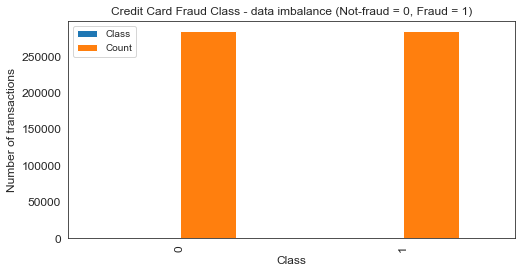

Text(0.5, 0, 'Percentage of count')

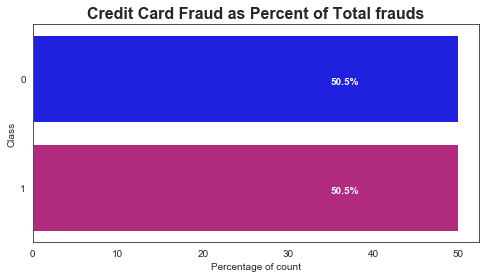

In [190]:
# Creating temp dataframe
df1 = pd.DataFrame({'Class': y_cnt.index,'Count': y_cnt.values})

ax = df1.plot(kind='bar', title ="Credit Card Fraud Class - data imbalance (Not-fraud = 0, Fraud = 1)", figsize=(8,4), legend=True, fontsize=12)
ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("Number of transactions", fontsize=12)
plt.show()

sns.set_style("white")
x2 = df1['Class']
y2 = df1['Count']*100/(sum(df1['Count']))
palette = ['blue','mediumvioletred']
fig, ax = plt.subplots(figsize = (8,4))

fig = sns.barplot(y2, x2, ci = None, orient='h', palette=palette)
y_lab = ['0', '1']
ax.set_yticklabels(labels=y_lab, ha='right')

for i, v in enumerate(y2):
    ax.text(v - 15, i + .05, str(int(v)+.5)+'%', color='white', fontweight='bold')

plt.title('Credit Card Fraud as Percent of Total frauds',size = 16, weight = 'bold')
plt.ylabel('Class')
plt.xlabel('Percentage of count')

- <b>The above plot clearly states that the predictor variables are equally distributed that is they are balanced using SMOTE.</b>

## Splitting the data into Train and Test Dataset

In [191]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.3, shuffle=True, random_state=0)

In [192]:
#Checking on the dimensions of the train and test data
print("X_train - ",X_train_sm.shape)
print("y_train - ",y_train_sm.shape)
print("X_test - ",X_test_sm.shape)
print("y_test - ",y_test_sm.shape)

X_train -  (398041, 29)
y_train -  (398041,)
X_test -  (170589, 29)
y_test -  (170589,)


### Model1: Logistic Regression

In [193]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [194]:
# Predict from Test data
y_pred_sm = logreg.predict(X_test_sm)
y_pred_proba = logreg.predict_proba(X_test_sm)[:, 1] #loss
[fpr, tpr, thr] = roc_curve(y_test_sm, y_pred_sm)

In [195]:
# Checking classification scores
print('Metrics:')
print('Accuracy: ', metrics.accuracy_score(y_pred_sm , y_test_sm))
print('log_loss: ', log_loss(y_test_sm, y_pred_proba))
print('Precision: ', metrics.precision_score(y_test_sm , y_pred_sm))
print('Recall: ', metrics.recall_score(y_test_sm , y_pred_sm))
print('F1: ', metrics.f1_score(y_test_sm , y_pred_sm))
print('AUC: ', auc(fpr, tpr))

print('\n')

print('Classification report: \n', metrics.classification_report(y_test_sm , y_pred_sm))

Metrics:
Accuracy:  0.9462040342577774
log_loss:  0.13259163084803965
Precision:  0.9732581814570194
Recall:  0.91777983305431
F1:  0.9447052089295935
AUC:  0.9462449158226981


Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     85172
           1       0.97      0.92      0.94     85417

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



### Plotting the ROC Curve

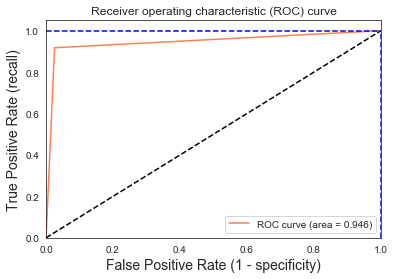

Using a threshold of 0.000 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.


In [196]:
#AUC Plot
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### Hyperparameter Tuning - Grid Search

In [197]:
logreg_cv = LogisticRegression()

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.001,0.05,1.1,1.5,2,2.5], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True)

#Running the Model with above chosen parameter
lr_model = GridSearchCV(estimator = logreg_cv, param_grid = parameters , scoring = 'accuracy', cv = folds, n_jobs = -1 , verbose = 2)

In [198]:
# fitting the model using GridSearch
lr_model.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   30.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.05, 1.1, 1.5, 2, 2.5],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [199]:
# print best hyperparameters
print("Best AUC: ", lr_model.best_score_)
best_lr_params = lr_model.best_params_
print("Best hyperparameters: ", best_lr_params)

Best AUC:  0.9460055621008567
Best hyperparameters:  {'C': 1.1, 'penalty': 'l2'}


### Running the model with best parameters obtained from grid search

In [200]:
# Making the Final Classification model.
lr = LogisticRegression(C = 2, penalty = 'l2')
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(C=2)

### Predicting the Train Dataset results and calculating the accuracy

In [201]:
y_pred_train = lr.predict(X_train_sm)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [202]:
# performance
print(f'Accuracy Score: {metrics.accuracy_score(y_train_sm,y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_sm, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_sm, y_pred_train)}')
print('\n')
print("F1 score:",metrics.f1_score(y_train_sm, y_pred_train))
print("Recall:",metrics.recall_score(y_train_sm, y_pred_train))
print("Precision:",metrics.precision_score(y_train_sm, y_pred_train))

Accuracy Score: 0.9460532960172444
Confusion Matrix: 
[[194287   4856]
 [ 16617 182281]]
Area Under Curve: 0.9460350888381094


F1 score: 0.9443755099926172
Recall: 0.9164546652052811
Precision: 0.9740510962556843


### Predicting the Test Dataset results and calculating the accuracy

In [203]:
y_pred = lr.predict(X_test_sm)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [204]:
# Performance
print(f'Accuracy Score: {metrics.accuracy_score(y_test_sm,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_sm, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test_sm, y_pred)}')
print('\n')
print("F1 score:",metrics.f1_score(y_test_sm, y_pred))
print("Recall:",metrics.recall_score(y_test_sm, y_pred))
print("Precision:",metrics.precision_score(y_test_sm, y_pred))

Accuracy Score: 0.9462040342577774
Confusion Matrix: 
[[83017  2155]
 [ 7022 78395]]
Area Under Curve: 0.9462448989845267


F1 score: 0.9447058752643598
Recall: 0.9177915403256963
Precision: 0.9732464307883302


<b>The AUC for both Train and Test dataset that is on an balanced dataset is almost the same.

- The Area Under Curve for Train Dataset - 0.946
- The Area Under Curve for Test Dataset - 0.946
    
This means that the model is good.</b> 

### Model2: Decision Tree

In [205]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier 

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [206]:
# Making predictions
y_pred_dt = dt_classifier.predict(X_test_sm)

# Printing classification report
print(classification_report(y_test_sm, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [207]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test_sm,y_pred_dt))
print("Accuracy Score: ", accuracy_score(y_test_sm,y_pred_dt))

[[84917   255]
 [  121 85296]]
Accuracy Score:  0.9977958719495396


### Hyperparameter Tuning - Grid Search

In [208]:
# Create the parameter grid 
param_grid = {
    'max_depth': list(range(2,4,1)),
    'min_samples_leaf': list(range(5,7,1)),
    'min_samples_split': list(range(5,7,1)),
    'criterion': ["entropy", "gini"]
}


# create 5 folds
n_folds = StratifiedKFold(n_splits = 5, shuffle = True)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
dtree_gridsearch = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1)

# Fit the grid search to the data
dtree_gridsearch.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  5.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [5, 6]},
             verbose=1)

In [209]:
# Checking for the best parameters
best_parameters = dtree_gridsearch.best_estimator_
print('The best parameters for using this model is', best_parameters)
print("best accuracy", dtree_gridsearch.best_score_)

The best parameters for using this model is DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5)
best accuracy 0.935235312719042


### Running the model with best parameters obtained from grid search

In [210]:
# model with optimal hyperparameters
dt_Classifier_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  max_depth=3, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
dt_Classifier_entropy.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=5)

### Predicting the Train Dataset results and calculating the accuracy

In [211]:
y_pred_train = dt_Classifier_entropy.predict(X_train_sm)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [212]:
print("Classification Report: \n", classification_report(y_train_sm, y_pred_train))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93    199143
           1       0.95      0.91      0.93    198898

    accuracy                           0.93    398041
   macro avg       0.93      0.93      0.93    398041
weighted avg       0.93      0.93      0.93    398041



In [213]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train_sm,y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_sm, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_sm, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train_sm, y_pred_train))
print("Recall:",metrics.recall_score(y_train_sm, y_pred_train))
print("Precision:",metrics.precision_score(y_train_sm, y_pred_train))

Accuracy Score: 0.9284219464829
Confusion Matrix: 
[[188644  10499]
 [ 17992 180906]]
Area Under Curve: 0.9284103324888345


F1 score: 0.9270028670033282
Recall: 0.9095415740731431
Precision: 0.9451477234137039


### Predicting the Test Dataset results and calculating the accuracy

In [214]:
y_pred_test = dt_Classifier_entropy.predict(X_test_sm)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [215]:
print(classification_report(y_test_sm, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     85172
           1       0.95      0.91      0.93     85417

    accuracy                           0.93    170589
   macro avg       0.93      0.93      0.93    170589
weighted avg       0.93      0.93      0.93    170589



In [216]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test_sm, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_sm, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test_sm, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test_sm, y_pred_test))
print("Recall:",metrics.recall_score(y_test_sm, y_pred_test))
print("Precision:",metrics.precision_score(y_test_sm, y_pred_test))

Accuracy Score: 0.9288523879030887
Confusion Matrix: 
[[80696  4476]
 [ 7661 77756]]
Area Under Curve: 0.9288790559367638


F1 score: 0.9276046979105155
Recall: 0.9103105939098775
Precision: 0.9455686350812336


<b>The AUC for both Train and Test dataset that is on an balanced dataset are the same.

- The Area Under Curve for Train Dataset - 0.928
- The Area Under Curve for Test Dataset - 0.928

This means that the model is good.</b>

### Model3: Random Forest

In [217]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier()

In [218]:
# Making predictions
y_pred_rf = rfc.predict(X_test_sm)

# Let's check the report of our default model
print(classification_report(y_test_sm, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [219]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test_sm,y_pred_rf))
print("Accuracy Score: ", accuracy_score(y_test_sm,y_pred_rf))

[[85154    18]
 [    0 85417]]
Accuracy Score:  0.9998944832316269


### Hyperparameter Tuning - Grid Search

In [220]:
# Create a based model
rf = RandomForestClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [10, 25],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,20],
    'criterion' :['gini', 'entropy']
}

# Instantiate the grid search model
rf_gridSearch = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5 ,n_jobs = -1,verbose = 1)

# Fit the grid search to the data
rf_gridSearch.fit(X_train_sm,y_train_sm)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 50.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 25]},
             verbose=1)

In [221]:
# Checking for the best parameters
best_parameters = rf_gridSearch.best_params_
print('The best parameters for using this model is', best_parameters)
print("Accuracy", rf_gridSearch.best_score_)

The best parameters for using this model is {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 25}
Accuracy 0.9998166020408682


### Running the model with best parameters obtained from grid search

In [222]:
rfc=RandomForestClassifier(max_features='auto', n_estimators= 25, max_depth=20, criterion='entropy')
#Fit the model
rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=25)

### Predicting the Train Dataset results and calculating the accuracy

In [223]:
y_pred_train = rfc.predict(X_train_sm)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [224]:
print(classification_report(y_train_sm, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199143
           1       1.00      1.00      1.00    198898

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041



In [225]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train_sm, y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_sm, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_sm, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train_sm, y_pred_train))
print("Recall:",metrics.recall_score(y_train_sm, y_pred_train))
print("Precision:",metrics.precision_score(y_train_sm, y_pred_train))

Accuracy Score: 0.9999598031358579
Confusion Matrix: 
[[199127     16]
 [     0 198898]]
Area Under Curve: 0.9999598278623903


F1 score: 0.9999597799965813
Recall: 1.0
Precision: 0.9999195632283299


### Predicting the Test Dataset results and calculating the accuracy

In [226]:
y_pred_test = rfc.predict(X_test_sm)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [227]:
print(classification_report(y_test_sm, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [228]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test_sm, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_sm, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test_sm, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test_sm, y_pred_test))
print("Recall:",metrics.recall_score(y_test_sm, y_pred_test))
print("Precision:",metrics.precision_score(y_test_sm, y_pred_test))

Accuracy Score: 0.9997831044205664
Confusion Matrix: 
[[85135    37]
 [    0 85417]]
Area Under Curve: 0.999782792467008


F1 score: 0.9997834623780513
Recall: 1.0
Precision: 0.9995670185128841


<b>The AUC for both Train and Test dataset that is on balanced dataset is the same

- The Area Under Curve for Train Dataset - 0.999
- The Area Under Curve for Test Dataset - 0.999</b>

### Model4: XGBoost

In [229]:
# Importing XGBoost Classifier library
from xgboost import XGBClassifier

XGB = XGBClassifier()

kfold = StratifiedKFold(n_splits=3, random_state=42)

# use area under the precision-recall curve to show classification accuracy
scoring = 'roc_auc'
results = cross_val_score(XGB, X_train_sm, y_train_sm, cv=kfold, scoring = scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.998 (0.000)


### Hyperparameter Tuning - Grid Search

In [230]:
# Create a based model
xgb_model = XGBClassifier()

# Create the parameter grid based on the results of random search 
param_tuning = {
    'learning_rate': [0.05, 0.1,0.2,0.3],
    'max_depth': range(1, 11, 2),
    'colsample_bytree': [0.3,0.5, 0.7],
    'gamma': [0,0.2,0.3],
    'min_child_weight' : [1,3,5],
    'n_estimators' : [10]
    }

folds = StratifiedKFold(n_splits =5, shuffle = True, random_state = 0)

# Instantiate the grid search model
xgb_gsearch = GridSearchCV(estimator = xgb_model,param_grid = param_tuning, scoring= 'roc_auc', cv = folds, n_jobs = -1, verbose = 1)

# Fit the grid search to the data
xgb_gsearch.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 102.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 129.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 173.8min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 190.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'gamma': [0, 0.2, 0.3],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': range(1, 11, 2),
                         'min_child_weight': [1, 3, 5], 'n_estimators': [10]},
             scoring='roc_auc', verbose=1)

In [231]:
# summarize results
print("Best AUC: %f using %s" % (xgb_gsearch.best_score_, xgb_gsearch.best_params_))

Best AUC: 0.999808 using {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 10}


### Running the model with best parameters obtained from grid search

In [232]:
XGB_model = XGBClassifier(colsample_bytree = 0.7, gamma =0.3, 
                          learning_rate = 0.3, max_depth = 9, 
                          min_child_weight =1, n_estimators = 10)
#Fit the model
XGB_model.fit(X_train_sm,y_train_sm)

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=9,
              n_estimators=10)

### Predicting the Train Dataset results and calculating the accuracy

In [233]:
y_pred_train = XGB_model.predict(X_train_sm)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [234]:
print(classification_report(y_train_sm, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199143
           1       1.00      1.00      1.00    198898

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041



In [235]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_train_sm, y_pred_train)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_train_sm, y_pred_train)}')
print(f'Area Under Curve: {roc_auc_score(y_train_sm, y_pred_train)}')
print('\n')
print('F1 score:', metrics.f1_score(y_train_sm, y_pred_train))
print("Recall:",metrics.recall_score(y_train_sm, y_pred_train))
print("Precision:",metrics.precision_score(y_train_sm, y_pred_train))

Accuracy Score: 0.9971535595579349
Confusion Matrix: 
[[198652    491]
 [   642 198256]]
Area Under Curve: 0.9971533249791643


F1 score: 0.9971507248928064
Recall: 0.9967722149041217
Precision: 0.9975295224582006


### Predicting the Test Dataset results and calculating the accuracy

In [236]:
y_pred_test = XGB_model.predict(X_test_sm)

### Checking for Performance - Accuracy, Confusion Matrix & AUC

In [237]:
print(classification_report(y_test_sm, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [238]:
# Performance
print(f'Accuracy Score: {accuracy_score(y_test_sm, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_sm, y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test_sm, y_pred_test)}')
print('\n')
print('F1 score:', metrics.f1_score(y_test_sm, y_pred_test))
print("Recall:",metrics.recall_score(y_test_sm, y_pred_test))
print("Precision:",metrics.precision_score(y_test_sm, y_pred_test))

Accuracy Score: 0.996600015241311
Confusion Matrix: 
[[84903   269]
 [  311 85106]]
Area Under Curve: 0.996600361829846


F1 score: 0.9966040563960841
Recall: 0.9963590385988738
Precision: 0.9968491947291361


<b>The AUC for both Train and Test dataset that is on balanced dataset looks almost same.

- The Area Under Curve for Train Dataset - 0.997 
- The Area Under Curve for Test Dataset - 0.996 </b>

## Selecting the best model based on Performance Matric

#### Dataframe to capture performance matrix for train and test dataset for each model

In [239]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    
    for name, model,Xdata,ydata in models:
        
        names_lst.append(name)

        # split data in train test set
        X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, shuffle=True, random_state=0)
        
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


### Logistic Regression performance Metrics

In [240]:
LRmodels = []

#model built with Hyperparameter tuning
LRi = LogisticRegression(solver='liblinear',C = 1.1, penalty = 'l2')
LRu = LogisticRegression(solver='liblinear',C = 0.05, penalty = 'l2')
LRo = LogisticRegression(solver='liblinear',C = 1.1, penalty = 'l2')
LRs = LogisticRegression(solver='liblinear',C = 2, penalty = 'l2')

LRmodels.append(('LR-imbalance', LRi,X,y))
LRmodels.append(('LR-Undersampling', LRu,X_rus, y_rus))
LRmodels.append(('LR-Oversampling', LRo,X_ros,y_ros))
LRmodels.append(('LR-SMOTE', LRs,X_smote, y_smote))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

Model Name : LR-imbalance
Train Accuracy :0.99920
Test Accuracy :0.99920
Train AUC : 0.81007
Test AUC : 0.80945
Train Precision : 0.88066
Test Precision : 0.88350
Train Recall : 0.62029
Test Recall : 0.61905
Train F1 : 0.72789
Test F1 : 0.72800
Confusion Matrix : 
 [[85284    12]
 [   56    91]]


Model Name : LR-Undersampling
Train Accuracy :0.95203
Test Accuracy :0.94257
Train AUC : 0.95196
Test AUC : 0.94282
Train Precision : 0.97546
Test Precision : 0.97826
Train Recall : 0.92711
Test Recall : 0.90604
Train F1 : 0.95067
Test F1 : 0.94077
Confusion Matrix : 
 [[144   3]
 [ 14 135]]


Model Name : LR-Oversampling
Train Accuracy :0.94917
Test Accuracy :0.94835
Train AUC : 0.94915
Test AUC : 0.94839
Train Precision : 0.97589
Test Precision : 0.97486
Train Recall : 0.92102
Test Recall : 0.92059
Train F1 : 0.94766
Test F1 : 0.94695
Confusion Matrix : 
 [[83144  2028]
 [ 6783 78634]]


Model Name : LR-SMOTE
Train Accuracy :0.94611
Test Accuracy :0.94624
Train AUC : 0.94609
Test AUC : 0.94

### Decision Tree performance Metrics

In [241]:
DTmodels = []

#model built with Hyperparameter tuning
DTi = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, 
                                  min_samples_leaf=6, min_samples_split=5)
DTu = DecisionTreeClassifier(criterion = "entropy", max_depth=3, 
                                  min_samples_leaf=5, min_samples_split=6)
DTo = DecisionTreeClassifier(criterion = "entropy", max_depth=3, 
                                  min_samples_leaf=5, min_samples_split=5)
DTs = DecisionTreeClassifier(criterion = "entropy", max_depth=3, 
                                  min_samples_leaf=5, min_samples_split=5)

DTmodels.append(('DT-imbalance', DTi,X,y))
DTmodels.append(('DT-Undersampling', DTu,X_rus, y_rus))
DTmodels.append(('DT-Oversampling', DTo,X_ros, y_ros))
DTmodels.append(('DT-SMOTE', DTs,X_smote, y_smote))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

Model Name : DT-imbalance
Train Accuracy :0.99943
Test Accuracy :0.99938
Train AUC : 0.89989
Test AUC : 0.88085
Train Precision : 0.85981
Test Precision : 0.86154
Train Recall : 0.80000
Test Recall : 0.76190
Train F1 : 0.82883
Test F1 : 0.80866
Confusion Matrix : 
 [[85278    18]
 [   35   112]]


Model Name : DT-Undersampling
Train Accuracy :0.94767
Test Accuracy :0.92568
Train AUC : 0.94754
Test AUC : 0.92617
Train Precision : 0.99357
Test Precision : 1.00000
Train Recall : 0.90087
Test Recall : 0.85235
Train F1 : 0.94495
Test F1 : 0.92029
Confusion Matrix : 
 [[147   0]
 [ 22 127]]


Model Name : DT-Oversampling
Train Accuracy :0.92989
Test Accuracy :0.92982
Train AUC : 0.92985
Test AUC : 0.92991
Train Precision : 0.99499
Test Precision : 0.99504
Train Recall : 0.86404
Test Recall : 0.86415
Train F1 : 0.92490
Test F1 : 0.92499
Confusion Matrix : 
 [[84804   368]
 [11604 73813]]


Model Name : DT-SMOTE
Train Accuracy :0.92842
Test Accuracy :0.92885
Train AUC : 0.92841
Test AUC : 0.92

### Random Forest performance Metrics

In [242]:
RFmodels = []

#model built after Hyperparameter tuning
RFi = RandomForestClassifier(max_features='log2', n_estimators= 25, max_depth=20, criterion='entropy')
RFu = RandomForestClassifier(max_features='auto', n_estimators= 25, max_depth=20, criterion='entropy')
RFo = RandomForestClassifier(max_features='auto', n_estimators= 10, max_depth=20, criterion='entropy')
RFs = RandomForestClassifier(max_features='auto', n_estimators= 25, max_depth=20, criterion='entropy')

RFmodels.append(('RF-imbalance', RFi,X,y))
RFmodels.append(('RF-Undersampling', RFu,X_rus, y_rus))
RFmodels.append(('RF-Oversampling', RFo,X_ros, y_ros))
RFmodels.append(('RF-SMOTE', RFs,X_smote, y_smote))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

Model Name : RF-imbalance
Train Accuracy :0.99996
Test Accuracy :0.99951
Train AUC : 0.98986
Test AUC : 0.87412
Train Precision : 1.00000
Test Precision : 0.95652
Train Recall : 0.97971
Test Recall : 0.74830
Train F1 : 0.98975
Test F1 : 0.83969
Confusion Matrix : 
 [[85291     5]
 [   37   110]]


Model Name : RF-Undersampling
Train Accuracy :1.00000
Test Accuracy :0.93243
Train AUC : 1.00000
Test AUC : 0.93284
Train Precision : 1.00000
Test Precision : 0.99237
Train Recall : 1.00000
Test Recall : 0.87248
Train F1 : 1.00000
Test F1 : 0.92857
Confusion Matrix : 
 [[146   1]
 [ 19 130]]


Model Name : RF-Oversampling
Train Accuracy :1.00000
Test Accuracy :0.99995
Train AUC : 1.00000
Test AUC : 0.99995
Train Precision : 1.00000
Test Precision : 0.99991
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 0.99995
Confusion Matrix : 
 [[85164     8]
 [    0 85417]]


Model Name : RF-SMOTE
Train Accuracy :0.99997
Test Accuracy :0.99983
Train AUC : 0.99997
Test AUC : 0.99

### XGBoost performance Metrics

In [243]:
XGBmodels = []

#model built after Hyperparameter tuning
XGBi = XGBClassifier(colsample_bytree = 0.3, gamma =0, learning_rate = 0.2, 
                     max_depth = 7, min_child_weight =1, n_estimators = 50)
XGBu = XGBClassifier(colsample_bytree = 0.5, gamma =0.2, learning_rate = 0.2, 
                     max_depth = 3, min_child_weight =1, n_estimators = 25)
XGBo = XGBClassifier(colsample_bytree = 0.3, gamma =0, learning_rate = 0.3,
                          max_depth = 9, min_child_weight =1, n_estimators = 10)
XGBs = XGBClassifier(colsample_bytree = 0.7, gamma =0.3, learning_rate = 0.3, 
                     max_depth = 9, min_child_weight =1, n_estimators = 10)

XGBmodels.append(('XGB-imbalance', XGBi,X,y))
XGBmodels.append(('XGB-Undersampling', XGBu,X_rus, y_rus))
XGBmodels.append(('XGB-Oversampling', XGBo,X_ros, y_ros))
XGBmodels.append(('XGB-SMOTE', XGBs,X_smote,y_smote))

# Call function to create model and measure its performance
build_measure_model(XGBmodels)

Model Name : XGB-imbalance
Train Accuracy :0.99986
Test Accuracy :0.99951
Train AUC : 0.95942
Test AUC : 0.88091
Train Precision : 1.00000
Test Precision : 0.94118
Train Recall : 0.91884
Test Recall : 0.76190
Train F1 : 0.95770
Test F1 : 0.84211
Confusion Matrix : 
 [[85289     7]
 [   35   112]]


Model Name : XGB-Undersampling
Train Accuracy :0.98256
Test Accuracy :0.93581
Train AUC : 0.98251
Test AUC : 0.93606
Train Precision : 1.00000
Test Precision : 0.97101
Train Recall : 0.96501
Test Recall : 0.89933
Train F1 : 0.98220
Test F1 : 0.93380
Confusion Matrix : 
 [[143   4]
 [ 15 134]]


Model Name : XGB-Oversampling
Train Accuracy :0.99976
Test Accuracy :0.99976
Train AUC : 0.99976
Test AUC : 0.99976
Train Precision : 0.99952
Test Precision : 0.99952
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.99976
Test F1 : 0.99976
Confusion Matrix : 
 [[85131    41]
 [    0 85417]]


Model Name : XGB-SMOTE
Train Accuracy :0.99715
Test Accuracy :0.99660
Train AUC : 0.99715
Test AUC : 

### Building a Dataframe to check the performance measure for each model built

In [244]:
data = {'Model':names_lst,
       'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       'Precision_Train':precision_train_lst,
       'Precision_Test':precision_test_lst,
       'Recall_Train':recall_train_lst,
       'Recall_Test':recall_test_lst,
       'F1_Train':f1_train_lst,
       'F1_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['AUC_Test','Recall_Test','F1_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Train,Accuracy_Test,AUC_Train,AUC_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1_Train,F1_Test
10,RF-Oversampling,1.000000,0.999953,1.000000,0.999953,1.000000,0.999906,1.000000,1.000000,1.000000,0.999953
11,RF-SMOTE,0.999975,0.999830,0.999975,0.999830,0.999950,0.999661,1.000000,1.000000,0.999975,0.999830
14,XGB-Oversampling,0.999759,0.999760,0.999759,0.999759,0.999518,0.999520,1.000000,1.000000,0.999759,0.999760
15,XGB-SMOTE,0.997154,0.996600,0.997153,0.996600,0.997530,0.996849,0.996772,0.996359,0.997151,0.996604
2,LR-Oversampling,0.949166,0.948350,0.949149,0.948389,0.975889,0.974858,0.921025,0.920590,0.947664,0.946947
3,LR-SMOTE,0.946106,0.946239,0.946088,0.946280,0.974079,0.973237,0.916535,0.917873,0.944431,0.944745
1,LR-Undersampling,0.952035,0.942568,0.951963,0.942816,0.975460,0.978261,0.927114,0.906040,0.950673,0.940767
13,XGB-Undersampling,0.982558,0.935811,0.982507,0.936059,1.000000,0.971014,0.965015,0.899329,0.982196,0.933798
9,RF-Undersampling,1.000000,0.932432,1.000000,0.932840,1.000000,0.992366,1.000000,0.872483,1.000000,0.928571
6,DT-Oversampling,0.929889,0.929820,0.929849,0.929914,0.994992,0.995039,0.864041,0.864149,0.924904,0.924987


### Inference

Above is the result of the models trained. The scores for `Random Forest with Oversampling technique and the Random Forest with SMOTE technique models` are apt for our dataset! Each model has a high true positive rate and a low false-positive rate, which is exactly what we’re looking for.

The AUC scores for Random Forest with Oversampling technique is pretty high, which is what we need to check in our current dataset.The curve in AUC capture more True Positives but also incur more False Positives. This means we capture more fraudulent transactions, but also flag even more normal transactions as fraudulent. <b>So we will be using Random Forest with Oversampling technique as our final model, as this gives Recall score of 100% on both train and test datasets.</b>

## Best features using Random Forest oversampling technique

In [248]:
# Model used to fit the data in Random Forest using oversampling technique
# rfc.fit(X_train_ros, y_train_ros)

# display the relative importance of each attribute
imp_feature_scores = pd.Series(rfc.feature_importances_, index=X_train_ros.columns).sort_values(ascending=False)

imp_feature_scores.head(10)

V12    0.190964
V14    0.119398
V4     0.108255
V17    0.089494
V10    0.080794
V16    0.063358
V3     0.059768
V7     0.041536
V11    0.026969
V18    0.026460
dtype: float64

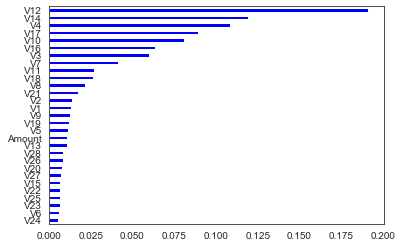

In [251]:
imp_feature_scores.sort_values(axis=0, ascending=True).plot(kind='barh',color='b')

<b> Above are the 10 important features in the order of most important feature to the least. This model using oversampling technique will help in accurately identify fraudulent credit card transactions.</b>

### Conclusion:

1. We modeled the data set of credit card transactions to achieve 100% accuracy for fraud detection. However, it was observed that at achieving 100% accuracy for fraud detection the number of incorrectly classified fraud transactions were higher than is desired. Such models will intially capture all the frauds, but will rigorously classify non-frauds as fradulent as well. It can be modelled further to reduce such undesired classifications, but will not miss out on any fraud transaction.

2. We further analysed that, this number can be significantly reduced by relaxing the data model at the cost of lowering the fraud detection accuracy by a small margin. Such models might leave out a few fraud transactions, but will reduce the effort of segregating the incorrect non-fraud classifications as well. 

3. By having higher RECALL value it is saving the Credit Card Company from bigger frauds and also helps in identifying correct fraudulent activities.